# Clustering stations by hourly occupacy behavior

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

The *time_dependence_set* dataframe contains the hourly behavior gotten form GAM regression, adjusting by weather and weekday number. Each station is represented as a column

In [ ]:
time_dependence_set = pd.read_csv('../misc_datasets/time_dependence_set.csv')

In [137]:
time_dependence_set.iloc[:,0:13].head()

,144,50,135,128,145,95,127,24,214,22,212,155,190
0,0.080074,-0.055861,0.017818,0.077613,-0.005196,0.034960,-0.023684,0.029962,0.177669,0.076657,0.141542,0.117882,-0.012409
1,0.082070,-0.057496,0.019435,0.078333,-0.001732,0.037146,-0.024603,0.029365,0.177555,0.075418,0.146540,0.118023,-0.018337
2,0.084016,-0.059016,0.020993,0.078985,0.001605,0.039302,-0.025498,0.028818,0.177452,0.074213,0.151295,0.118170,-0.024092
3,0.085914,-0.060425,0.022493,0.079571,0.004817,0.041429,-0.026370,0.028321,0.177359,0.073041,0.155812,0.118320,-0.029677
4,0.087765,-0.061723,0.023936,0.080092,0.007906,0.043526,-0.027218,0.027871,0.177275,0.071904,0.160094,0.118476,-0.035095


*Station_info* dataset contains information about the name, adress and geolocation of each station

In [138]:
stations = pd.read_csv('../misc_datasets/stations_info.csv') # Info about individual stations
stations = stations.loc[~stations['id'].isin([3, 29, 54, 68, 137, 219, 203, 217, 165])] #  Faulty stations

##  K-shape algorithm from kshape module

Reshape the dataframe as a numpy array

In [ ]:
time_series = time_dependence_set.T.values

Running kshape on data

In [ ]:
from kshape.core import kshape, zscore

In [ ]:
clusters = kshape(zscore(time_series, axis = 1), 4)

### Plot centroids and stations

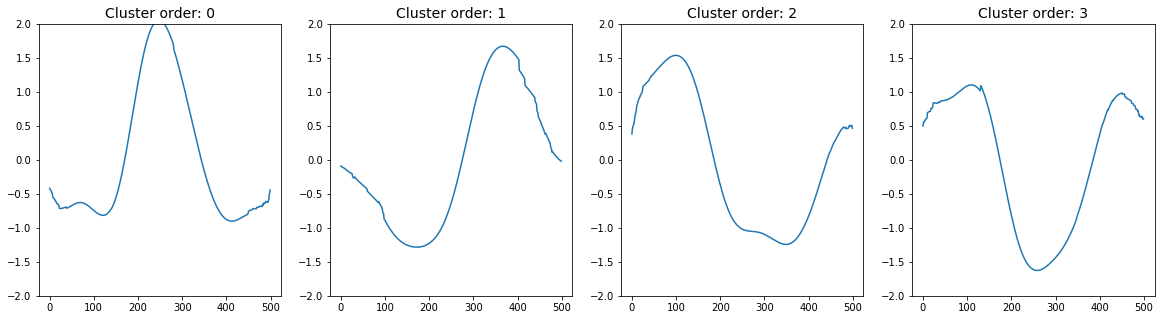

In [200]:
fig, axes =  plt.subplots(1, len(clusters), figsize=((len(clusters)*5),5))

for i,ax in enumerate(axes):
    ax.plot(clusters[i][0])
    ax.set_ylim(-2,2)
    ax.set_title(f'Cluster order: {i}', fontsize=14)

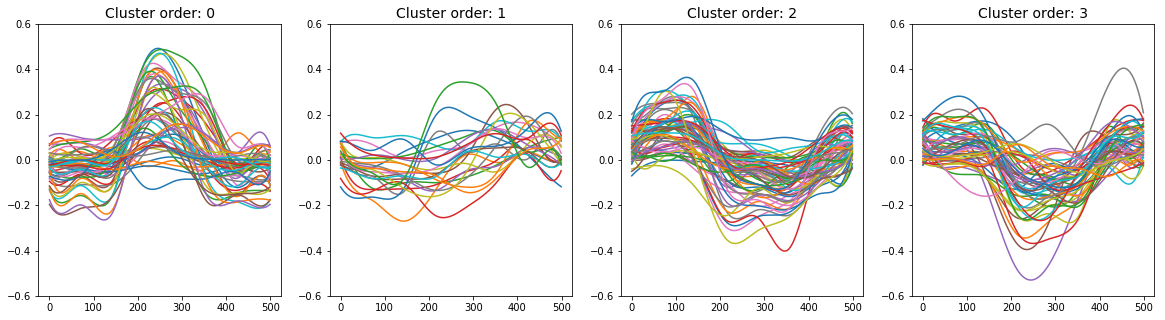

In [203]:
fig, axes =  plt.subplots(1, len(clusters), figsize=((len(clusters)*5),5))

for i,ax in enumerate(axes):
    ax.plot(time_dependence_set.loc[:,stations.loc[stations['cluster']==i].id.astype(str).values])
    ax.set_title(f'Cluster order: {i}', fontsize=14)
    ax.set_ylim(-0.6,0.6)

### Save cluster variable

Assign the new cluster numbers to each station index and save it in *station_info* dataset

In [79]:
groups = [combination[1] for combination in clusters]

In [117]:
groups_df = time_dependence_set.T.reset_index().iloc[:,0].to_frame()

In [124]:
groups_df['cluster'] = 999

In [129]:
for group_name, group in enumerate(groups):
    for row_index in group:
        temp = groups_df.loc[groups_df.index == int(row_index), 'cluster'] = int(group_name)

In [136]:
groups_df = groups_df.rename(columns={'index':'id'})

In [146]:
groups_df['id'] = groups_df['id'].astype(int)

In [148]:
stations = pd.merge(stations, groups_df, on='id',how='left')

In [149]:
stations.to_csv('../misc_datasets/stations.csv')

## Visualizing clusters on a map

In [187]:
import folium
import seaborn as sns

In [190]:
mp = folium.Map(location=[-34.606682, -58.435278], zoom_start=12,tiles='cartodbpositron')

for i in range(len(stations)):
    folium.CircleMarker(location = [stations.latitude.loc[i], stations.longitude.loc[i]],
                    radius = 4,
                    popup = f'Cluster order: {stations.cluster.loc[i]}',
                    color = sns.color_palette("Set1", 4).as_hex()[int(stations.cluster.loc[i])],
                    fill = True,
                    fill_opacity = 0.8).add_to(mp)

In [191]:
mp